In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
donors = pd.read_csv("donors.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
donations = pd.read_csv("donations.csv")

In [4]:

donors.shape

(2122640, 5)

In [5]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [6]:
donations.shape

(1048575, 7)

In [7]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation 0f 15% to donorchoose.org,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,8/23/2016 13:15
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,6/6/2016 20:05
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,6/6/2016 14:08
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,5/15/2016 10:23
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,5/17/2016 1:23


### Exploring Donors

In [8]:
donors.isnull().sum()

Donor ID                 0
Donor City          213097
Donor State              0
Donor Is Teacher         0
Donor Zip           180060
dtype: int64

In [9]:
# Percentages of Missing Values in Column 'Donor City'

(donors['Donor City'].isnull().sum()/donors.shape[0])*100

10.039243583462104

In [10]:
# Percentages of Missing Values in Column 'Donor Zip'

(donors['Donor Zip'].isnull().sum()/donors.shape[0])*100

8.4828326989032536

In [11]:
len(donors['Donor ID'].unique())

2122640

In [12]:
len(donors['Donor City'].unique())

15205

In [13]:
# Sorting States on Basis of Frequecy

donors.groupby('Donor State')['Donor State'].count().sort_values(ascending=False)

Donor State
California              294695
New York                137957
Texas                   134449
Florida                 108828
other                   107809
Illinois                104381
North Carolina           84250
Pennsylvania             72280
Georgia                  63731
Massachusetts            60730
Michigan                 60435
New Jersey               54266
Virginia                 53022
Ohio                     52571
Washington               47963
South Carolina           47043
Indiana                  43237
Arizona                  41529
Maryland                 36375
Missouri                 35820
Wisconsin                33217
Colorado                 32704
Connecticut              31604
Minnesota                31183
Tennessee                30604
Oklahoma                 30133
Oregon                   29743
Louisiana                24519
Alabama                  23312
Utah                     21589
Kentucky                 18929
Nevada                   16

In [14]:
# Sorting City on Basis of Frequecy

donors.groupby('Donor City')['Donor City'].count().sort_values(ascending=False)

Donor City
Chicago              34352
New York             27863
Brooklyn             22330
Los Angeles          18320
San Francisco        16925
Houston              15839
Portland             13039
Seattle              12984
Atlanta              12537
Philadelphia         12381
Washington           11568
Charlotte            10290
Austin               10249
Indianapolis         10125
Phoenix               9645
Miami                 9605
San Diego             9205
Denver                8937
Dallas                8593
Minneapolis           8571
San Jose              7845
Oklahoma City         7651
Saint Louis           7593
Oakland               7221
Columbus              6805
San Antonio           6602
Las Vegas             6500
Arlington             6389
Louisville            6329
Pittsburgh            6328
                     ...  
Corriganville            1
Correll                  1
Powderhorn               1
Corral                   1
Poynor                   1
Prairie Hill     

### Exploring Donations

In [15]:
donations.isnull().sum()

Project ID                                                       0
Donation ID                                                      0
Donor ID                                                         0
Donation Included Optional Donation 0f 15% to donorchoose.org    0
Donation Amount                                                  0
Donor Cart Sequence                                              0
Donation Received Date                                           0
dtype: int64

In [16]:
donations.shape[0]

1048575

In [17]:
len(donations['Donation ID'])

1048575

In [18]:
len(donations['Donation ID'].unique())

1048568

In [19]:
# Finding Duplicate Records

df=donations['Donation ID']

df[df.duplicated(keep=False)]


127589    c8689b5750748bdf987f7c2b1ce36c5b
127590    c8689b5750748bdf987f7c2b1ce36c5b
157022    d93a8bb381345d10c75aa6e590eae257
157034    d93a8bb381345d10c75aa6e590eae257
201918    ec7fedbc05656a1675898e325598101a
201919    ec7fedbc05656a1675898e325598101a
212456    3aba50dc6813f02a1de167e8556963be
212457    3aba50dc6813f02a1de167e8556963be
449152    3b3ec32441959bc337ad25ad4aeb81b8
449154    3b3ec32441959bc337ad25ad4aeb81b8
606370    a92737584ed38f422e81340466785558
606371    a92737584ed38f422e81340466785558
643817    5fff777a5c8193b666f4b47773a04bee
643818    5fff777a5c8193b666f4b47773a04bee
Name: Donation ID, dtype: object

In [20]:
donations.groupby('Donation ID')['Donation ID'].count().sort_values(ascending=False)

Donation ID
a92737584ed38f422e81340466785558    2
3b3ec32441959bc337ad25ad4aeb81b8    2
3aba50dc6813f02a1de167e8556963be    2
5fff777a5c8193b666f4b47773a04bee    2
ec7fedbc05656a1675898e325598101a    2
d93a8bb381345d10c75aa6e590eae257    2
c8689b5750748bdf987f7c2b1ce36c5b    2
551df0921678c440fbd063ff1ce3ab86    1
551dec0a40b2a12aa643bfd1a740536f    1
551dec3bd276c2d38f168eff2763be45    1
fffffe8705a636d6eaafe31c91de68ba    1
551e16180a1ccc177fbbefa1d3a18d71    1
551e53b6e2fd77d2a57ec680a1d81d4c    1
551e5adc1dc971ea6fc79b9119693e61    1
551e605832a64d1bfb76f5a790d58ee5    1
551e895afc054d9604a2b46b464eb849    1
551eb76111954d83543009c4f518cf5a    1
551e00651013f7337330684865111fe5    1
551de3dc2e7b29b96413187db504a484    1
551de9e9d72ccbcee2ac21d7ad3330fa    1
551efa672786b08c4693cec963c9b22b    1
551dd7529674d74f9ee7d2a6527e3d96    1
551daf2e1db089fe053998457110c5f9    1
551da9ae7d670eafd9b4f51d3206cebf    1
551da8c4f5ba3f8183ae65ea4e520734    1
551d85ac2dc242dfc9d8c17ac2046bf1    1


In [21]:
print ('Total Donors:',len(donations['Donor ID']))

print ('Total Unique Donors:',len(donations['Donor ID'].unique()))

Total Donors: 1048575
Total Unique Donors: 600835


In [22]:
print ('Total Repeated Donors:',len(donations['Donor ID'])-len(donations['Donor ID'].unique()))

Total Repeated Donors: 447740


In [23]:
donations.groupby('Donor ID')['Donor ID'].count().sort_values(ascending=False)


Donor ID
237db43817f34988f9d543ca518be4ee    3290
39df9399f5384334a42905bcf0acdcbf    2957
a0e1d358aa17745ff3d3f4e4909356f3    2304
6f74ffb17cbb2b616b1eef06bd4acd0c    2102
a1929a1172ad0b3d14bc84f54018c563    1514
19f24640d9da49f6f8b4c9938c049591    1373
24ecca49933c30a0beb83090591720c0    1335
6a35a7514005c04f8520e5d8f7657d91    1177
b51c76411b51751f45527c63c69ead9e    1168
74f7db06bcd9557d1e992dc029db69cc    1096
f37b9ff133242d08658ca2b17b3ab84c    1040
75e09805b663bbe4b80b40034c192b4a     990
0e345dcdef0d2a36c9bd17bf1ac3e10a     979
4416745560343f14a74dedcda4ec03b0     955
a7fa881a86cb4c7e70815b38168d1702     951
0cd96e83a645971f6deb4559262b7688     912
a299db9679f7746a805fbc300362191d     906
86d57a6264726b2a94c5b9663f46330c     881
406518edf1c30d599de90e2055a697fc     849
6dd7995a998f79a8c65a0d400c9a5350     839
c376c98b0cdb746cf025bb21ee810376     799
d24347fdee199ae9395ad44484e1caf7     796
e7692ca3a0fe35653c173de80adfc880     785
d006be7223c048ae8b2bdedd7dd2b4db     753
a7dbf5c

In [24]:
donorsid = donations['Donor ID']
type(donorsid)


donorsid=donorsid.value_counts()
donorsid[0]

3290

In [25]:
# Sorted DF of Donors on Basis of number of donations

df5 = pd.DataFrame(data=donorsid.index, columns=['Donor ID'])
df6 = pd.DataFrame(data=donorsid.values, columns=['No of Donations'])
df7 = pd.merge(df5, df6, left_index=True, right_index=True)
df7.head()

,Donor ID,No of Donations
0,237db43817f34988f9d543ca518be4ee,3290
1,39df9399f5384334a42905bcf0acdcbf,2957
2,a0e1d358aa17745ff3d3f4e4909356f3,2304
3,6f74ffb17cbb2b616b1eef06bd4acd0c,2102
4,a1929a1172ad0b3d14bc84f54018c563,1514


### Analysis of 1 Donor

In [26]:
donor_1 = df7['Donor ID'][0]
donor_1

'237db43817f34988f9d543ca518be4ee'

In [27]:
# Donation Data of 1 Donor

donor1_df = pd.DataFrame(donations[(donations['Donor ID'] == donor_1)])

donor1_df=donor1_df.drop(['Project ID', 'Donation ID', 'Donor ID', 'Donor Cart Sequence'], axis=1)

donor1_df.head()

,Donation Included Optional Donation 0f 15% to donorchoose.org,Donation Amount,Donation Received Date
213,Yes,1.0,3/30/2015 20:32
214,No,3.3,3/30/2015 11:03
222,No,5.0,3/29/2015 16:37
1267,No,3.0,6/5/2014 9:04
1280,No,4.0,5/26/2014 22:02


In [28]:
donor1_df.dtypes

Donation Included Optional Donation 0f 15% to donorchoose.org     object
Donation Amount                                                  float64
Donation Received Date                                            object
dtype: object

In [29]:

donor1_df['Donation Received Date'] = pd.to_datetime(donor1_df['Donation Received Date'])

donor1_df.dtypes

Donation Included Optional Donation 0f 15% to donorchoose.org            object
Donation Amount                                                         float64
Donation Received Date                                           datetime64[ns]
dtype: object

In [30]:
# Stats of Donation Amount

print (donor1_df['Donation Amount'].describe())

print ('\nTotal Donation:',donor1_df['Donation Amount'].sum())

count    3290.000000
mean        5.822298
std         9.542694
min         1.000000
25%         1.000000
50%         5.000000
75%         5.000000
max       148.470000
Name: Donation Amount, dtype: float64

Total Donation: 19155.360000000008


In [31]:
donor1_df['Donation Received Date'].describe()

count                    3290
unique                   2611
top       2017-11-28 11:07:00
freq                       12
first     2013-01-06 17:43:00
last      2018-05-09 11:38:00
Name: Donation Received Date, dtype: object

In [32]:


donor1_df['Date'] = [d.date() for d in donor1_df['Donation Received Date']]
donor1_df['Time'] = [d.time() for d in donor1_df['Donation Received Date']]

donor1_df.head()
donor1_df.dtypes

Donation Included Optional Donation 0f 15% to donorchoose.org            object
Donation Amount                                                         float64
Donation Received Date                                           datetime64[ns]
Date                                                                     object
Time                                                                     object
dtype: object

In [33]:
donor1_df['Date'] = pd.to_datetime(donor1_df['Date'])
donor1_df.head()

,Donation Included Optional Donation 0f 15% to donorchoose.org,Donation Amount,Donation Received Date,Date,Time
213,Yes,1.0,2015-03-30 20:32:00,2015-03-30,20:32:00
214,No,3.3,2015-03-30 11:03:00,2015-03-30,11:03:00
222,No,5.0,2015-03-29 16:37:00,2015-03-29,16:37:00
1267,No,3.0,2014-06-05 09:04:00,2014-06-05,09:04:00
1280,No,4.0,2014-05-26 22:02:00,2014-05-26,22:02:00


In [40]:
donor1_yr = donor1_df[['Donation Amount', 'Date']].copy()
donor1_yr.head()

,Donation Amount,Date
213,1.0,2015-03-30
214,3.3,2015-03-30
222,5.0,2015-03-29
1267,3.0,2014-06-05
1280,4.0,2014-05-26


### Time Series of Donor 1

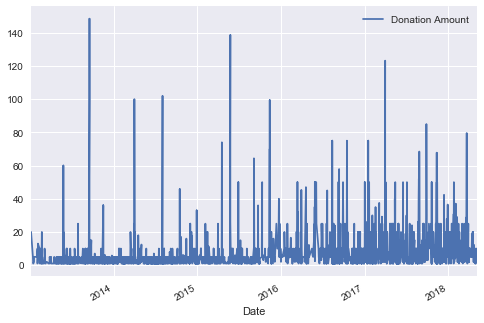

In [42]:
plt.figure()
donor1_yr.plot(x='Date', y='Donation Amount')
plt.show()

### Sort Year wise & then Divide

In [45]:
donor1_yr_s = donor1_yr.sort_values(by=['Date'])
donor1_yr_s.head()

,Donation Amount,Date
667625,20.0,2013-01-06
842361,5.0,2013-01-14
187816,1.0,2013-01-15
833596,1.0,2013-01-15
192717,1.0,2013-01-16


In [46]:
donor1_2013_df = donor1_yr_s[(donor1_yr_s['Date'] >= '2013-1-1') & (donor1_yr_s['Date'] < '2014-1-1')]
donor1_2013_df.head()

,Donation Amount,Date
667625,20.0,2013-01-06
842361,5.0,2013-01-14
187816,1.0,2013-01-15
833596,1.0,2013-01-15
192717,1.0,2013-01-16


### Time Series of 1 Donor for 1 Year

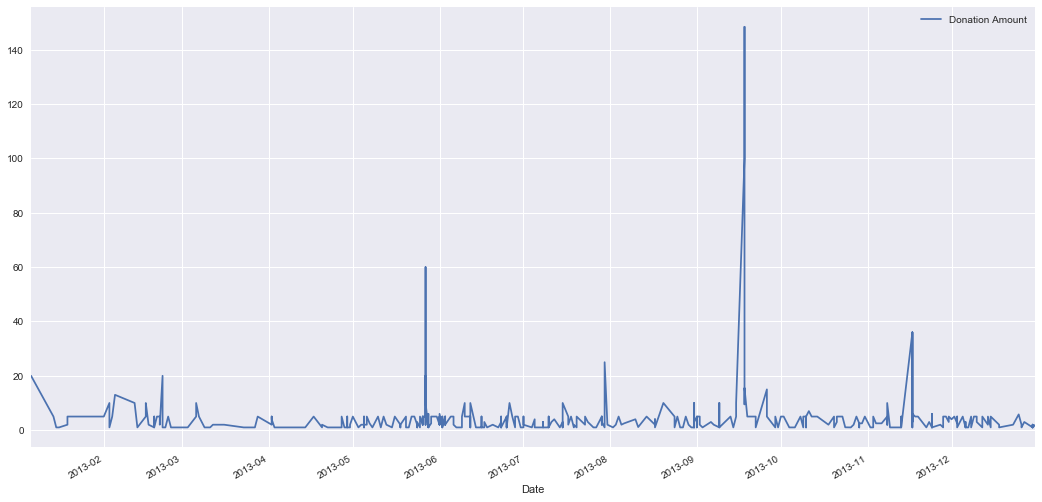

In [53]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 9]
donor1_2013_df.plot(x='Date', y='Donation Amount')
plt.show()

In [54]:
donor1_2014_df = donor1_yr_s[(donor1_yr_s['Date'] >= '2014-1-1') & (donor1_yr_s['Date'] < '2015-1-1')]
donor1_2015_df = donor1_yr_s[(donor1_yr_s['Date'] >= '2015-1-1') & (donor1_yr_s['Date'] < '2016-1-1')]
donor1_2016_df = donor1_yr_s[(donor1_yr_s['Date'] >= '2016-1-1') & (donor1_yr_s['Date'] < '2017-1-1')]
donor1_2017_df = donor1_yr_s[(donor1_yr_s['Date'] >= '2017-1-1') & (donor1_yr_s['Date'] < '2018-1-1')]
donor1_2018_df = donor1_yr_s[(donor1_yr_s['Date'] >= '2018-1-1') & (donor1_yr_s['Date'] < '2019-1-1')]


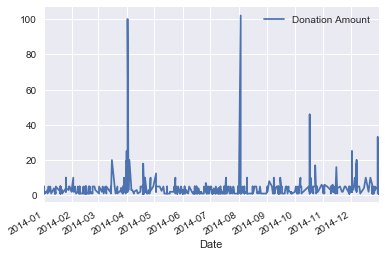

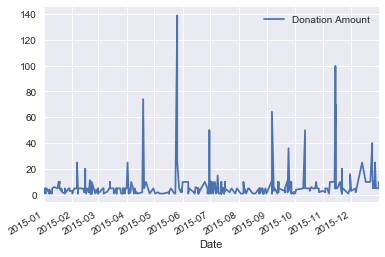

In [73]:
%matplotlib inline 

plt.figure()

 
#plt.rcParams['figure.figsize'] = [5, 5]
donor1_2014_df.plot(x='Date', y='Donation Amount')

donor1_2015_df.plot(x='Date', y='Donation Amount')




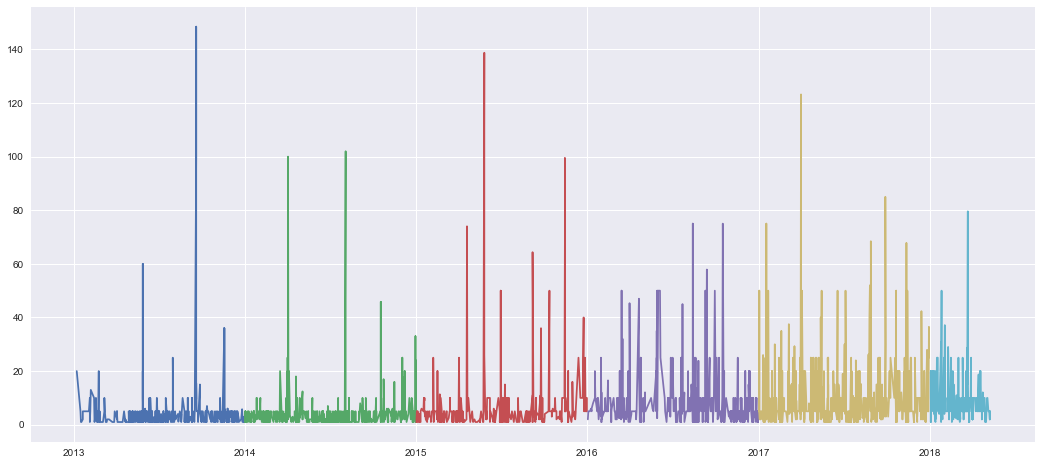

In [87]:
plt.rcParams['figure.figsize'] = [18, 8]

plt.plot('Date', 'Donation Amount',data=donor1_2013_df)
plt.plot('Date', 'Donation Amount',data=donor1_2014_df)
plt.plot('Date', 'Donation Amount',data=donor1_2015_df)
plt.plot('Date', 'Donation Amount',data=donor1_2016_df)
plt.plot('Date', 'Donation Amount',data=donor1_2017_df)
plt.plot('Date', 'Donation Amount',data=donor1_2018_df)

plt.show()

### Analysis of 1 State (California)

In [91]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [97]:
# Extracting Donors from California State

california_donors = donors[(donors['Donor State'] == 'California')]

california_donors=california_donors.drop(['Donor City', 'Donor Is Teacher', 'Donor Zip'], axis=1)
california_donors.head()


,Donor ID,Donor State
2,00002d44003ed46b066607c5455a999a,California
39,00010615b56ff057fa00b5144fe2e4cf,California
58,000177bef7ed7b7d1d0f5741d0b5fab8,California
59,00017bad30d4b5d991b81b04cb4988b8,California
61,000181f354f1cba54f958463835ced41,California


In [117]:
# Converting Series to Array

cali_donor_1 = california_donors['Donor ID']
cali_donor_1=pd.Series(cali_donor_1)
cali_donor_array=pd.Series(cali_donor_1).values


In [118]:
# Extracting Donations from California

california_donations = donations.loc[donations['Donor ID'].isin(cali_donor_array)]
california_donations=california_donors.drop(['Donor City', 'Donor Is Teacher', 'Donor Zip'], axis=1)
california_donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation 0f 15% to donorchoose.org,Donation Amount,Donor Cart Sequence,Donation Received Date
29,00006084c3d92d904a22e0a70f5c119a,8a836452317129fd6307e7f43b2007df,e5e938f44b6fb1d2ee335abfbd41a6d1,Yes,182.38,11,7/23/2017 3:08
49,0000c0bdc0f15bd239cfffa884791a10,a3e4d2d1d72978782fde6396c55c9f80,a3cfc28ca16f2927d02203c142279a16,Yes,22.68,2,7/27/2016 20:55
58,0000c0ea0aecb2ad60e8d234eab6ed28,c98c3e7f31daa01129a151076019ab3c,f2d7c9f3d87bcf44586efba06069f9a3,Yes,15.00,10,5/1/2018 1:19
60,0000c20705a45563f2ec6a53088c2a30,d72f9b4e0d8d8f7b8287ba86546e057d,0524c432dd77f69ba5918779516ea330,Yes,25.00,2,4/2/2016 18:59
108,0000fe73a95dae43c4bd72a142760efb,0685981a8b550f9d4fd642f763dcdda5,0e345dcdef0d2a36c9bd17bf1ac3e10a,Yes,11.23,1849,9/9/2014 2:05


In [119]:

california_donations=california_donations.drop(['Project ID', 'Donation ID', 'Donor ID', 'Donor Cart Sequence'], axis=1)
california_donations.head()

,Donation Included Optional Donation 0f 15% to donorchoose.org,Donation Amount,Donation Received Date
29,Yes,182.38,7/23/2017 3:08
49,Yes,22.68,7/27/2016 20:55
58,Yes,15.00,5/1/2018 1:19
60,Yes,25.00,4/2/2016 18:59
108,Yes,11.23,9/9/2014 2:05


In [121]:
california_donations['Donation Received Date'] = pd.to_datetime(california_donations['Donation Received Date'])
california_donations.dtypes

Donation Included Optional Donation 0f 15% to donorchoose.org            object
Donation Amount                                                         float64
Donation Received Date                                           datetime64[ns]
dtype: object

In [125]:
# Stats of California Donation Amount

print (california_donations['Donation Amount'].describe())

print ('\nTotal Donation:',california_donations['Donation Amount'].sum())

print ('\nDate/Time Stats')
california_donations['Donation Received Date'].describe()

count    157537.000000
mean         66.155406
std         164.428472
min           0.010000
25%          15.000000
50%          26.720000
75%          61.000000
max       14613.240000
Name: Donation Amount, dtype: float64

Total Donation: 10421924.170000017

Date/Time Stats


count                  157537
unique                 138437
top       2017-01-27 16:02:00
freq                       30
first     2012-10-09 22:34:00
last      2018-05-09 11:33:00
Name: Donation Received Date, dtype: object

In [126]:
california_donations['Date'] = [d.date() for d in california_donations['Donation Received Date']]
california_donations['Time'] = [d.time() for d in california_donations['Donation Received Date']]

california_donations.head()


,Donation Included Optional Donation 0f 15% to donorchoose.org,Donation Amount,Donation Received Date,Date,Time
29,Yes,182.38,2017-07-23 03:08:00,2017-07-23,03:08:00
49,Yes,22.68,2016-07-27 20:55:00,2016-07-27,20:55:00
58,Yes,15.00,2018-05-01 01:19:00,2018-05-01,01:19:00
60,Yes,25.00,2016-04-02 18:59:00,2016-04-02,18:59:00
108,Yes,11.23,2014-09-09 02:05:00,2014-09-09,02:05:00


In [128]:
california_donations['Date'] = pd.to_datetime(california_donations['Date'])

california_donations_yr = california_donations[['Donation Amount', 'Date']].copy()
california_donations_yr.head()

,Donation Amount,Date
29,182.38,2017-07-23
49,22.68,2016-07-27
58,15.00,2018-05-01
60,25.00,2016-04-02
108,11.23,2014-09-09


### Time Series of California State

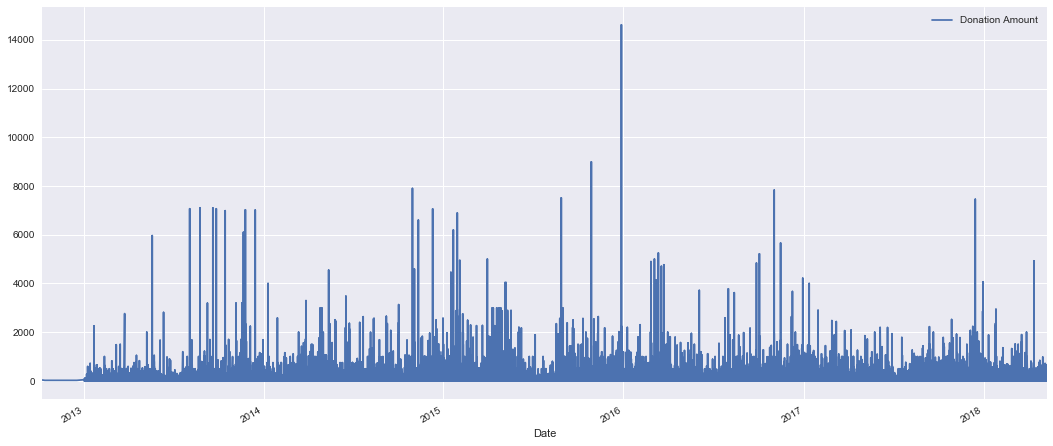

In [129]:
plt.figure()

california_donations_yr.plot(x='Date', y='Donation Amount')
plt.show()

In [131]:
# Sorting Year wise

california_donations_yr_s = california_donations_yr.sort_values(by=['Date'])

print (california_donations_yr_s.head())
california_donations_yr_s.tail()

        Donation Amount       Date
780449             40.0 2012-10-09
780417             25.0 2012-10-14
780424             25.0 2012-10-14
107369             25.0 2012-12-18
196469             50.0 2013-01-01


,Donation Amount,Date
216893,1.00,2018-05-09
216883,1.00,2018-05-09
793040,5.00,2018-05-09
138778,136.28,2018-05-09
938735,41.08,2018-05-09


In [132]:
# Slicing DataFrame on basis of Years

cali_donations_2012_df = california_donations_yr_s[(california_donations_yr_s['Date'] >= '2012-1-1') & (california_donations_yr_s['Date'] < '2013-1-1')]
cali_donations_2013_df = california_donations_yr_s[(california_donations_yr_s['Date'] >= '2013-1-1') & (california_donations_yr_s['Date'] < '2014-1-1')]
cali_donations_2014_df = california_donations_yr_s[(california_donations_yr_s['Date'] >= '2014-1-1') & (california_donations_yr_s['Date'] < '2015-1-1')]
cali_donations_2015_df = california_donations_yr_s[(california_donations_yr_s['Date'] >= '2015-1-1') & (california_donations_yr_s['Date'] < '2016-1-1')]
cali_donations_2016_df = california_donations_yr_s[(california_donations_yr_s['Date'] >= '2016-1-1') & (california_donations_yr_s['Date'] < '2017-1-1')]
cali_donations_2017_df = california_donations_yr_s[(california_donations_yr_s['Date'] >= '2017-1-1') & (california_donations_yr_s['Date'] < '2018-1-1')]
cali_donations_2018_df = california_donations_yr_s[(california_donations_yr_s['Date'] >= '2018-1-1') & (california_donations_yr_s['Date'] < '2019-1-1')]


### Time Series of 1 State for 1 Year

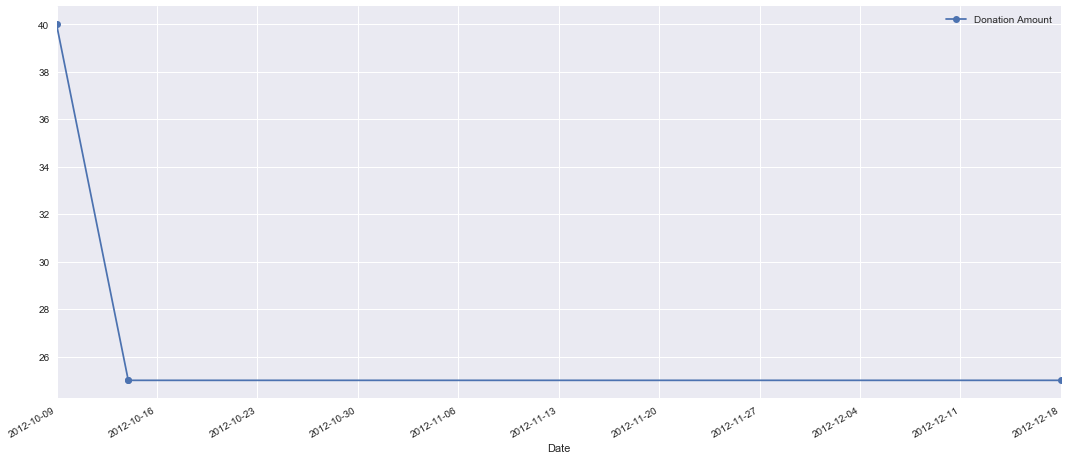

In [146]:
cali_donations_2012_df.plot(x='Date', y='Donation Amount', style='o-')
plt.show()

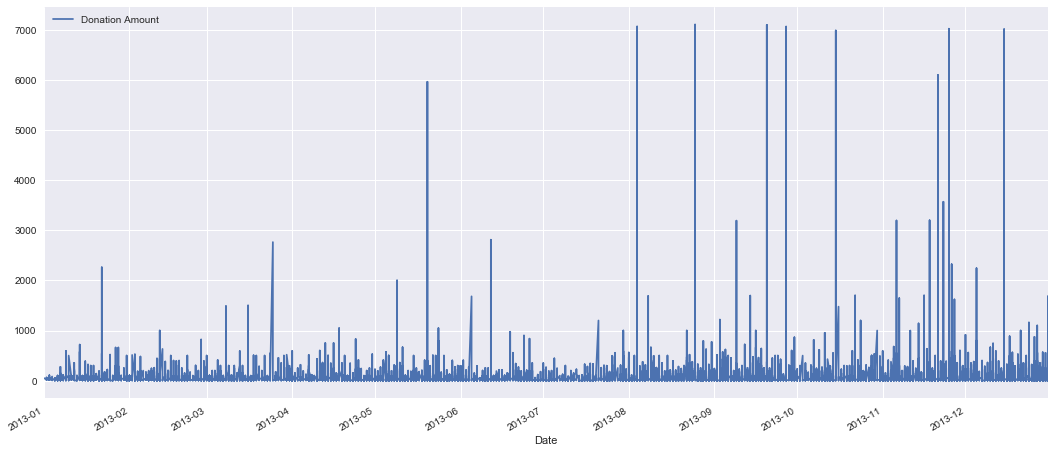

In [148]:
cali_donations_2013_df.plot(x='Date', y='Donation Amount')
plt.show()

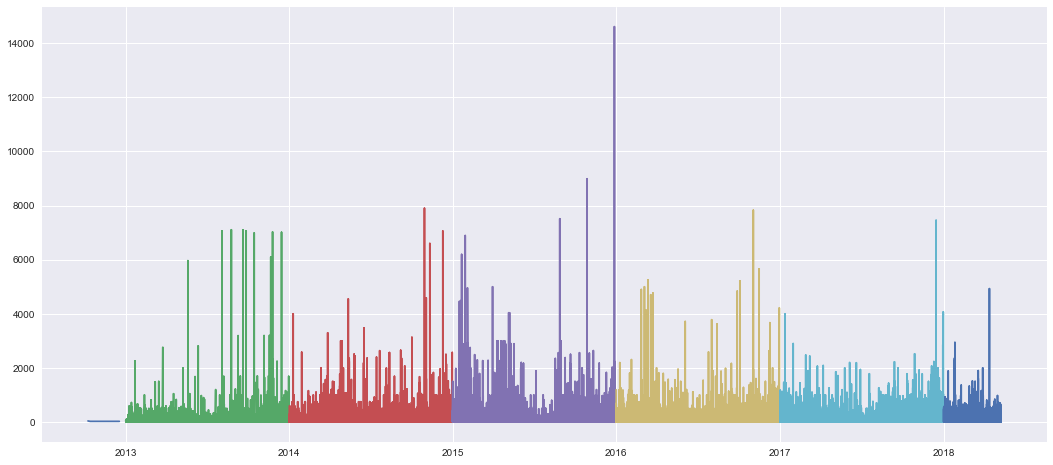

In [149]:
# TIME SERIES OF CALIFORNIA IN ALL YEARS

plt.plot('Date', 'Donation Amount',data=cali_donations_2012_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2013_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2014_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2015_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2016_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2017_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2018_df)


plt.show()

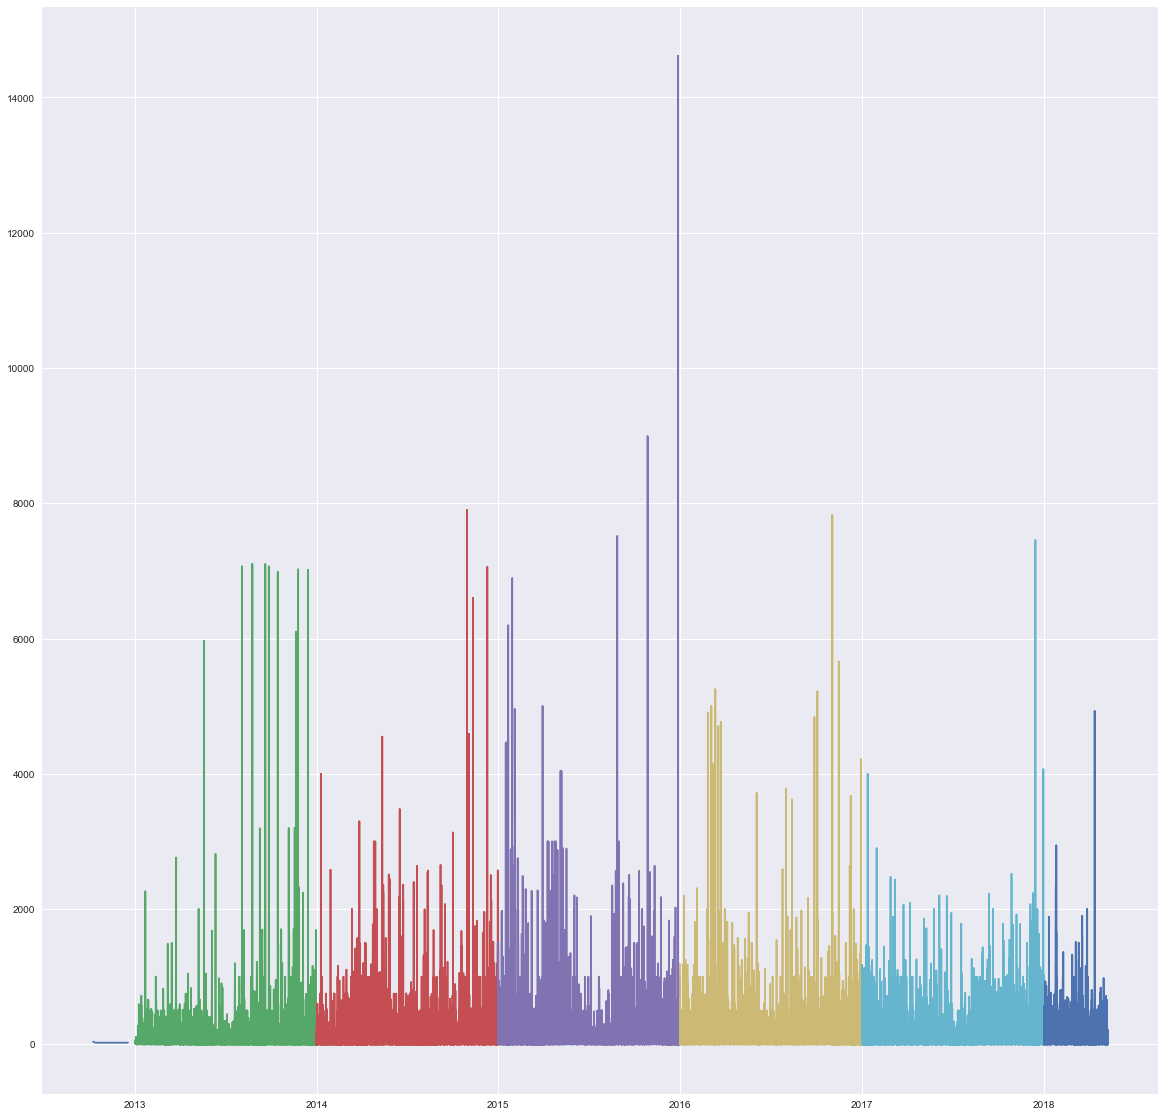

In [152]:
# More Visuals

plt.rcParams['figure.figsize'] = [20, 20]
plt.plot('Date', 'Donation Amount',data=cali_donations_2012_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2013_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2014_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2015_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2016_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2017_df)
plt.plot('Date', 'Donation Amount',data=cali_donations_2018_df)


plt.show()